# Alejandro Prompt:

The marketing team reports that the user engagement metrics code is showing impossible results (bounce rates over 100%, negative session times).

Problematic Code:

def analyze_user_engagement(logs_df):
    metrics = {
        'bounce_rate': logs_df.groupby('session_id')['page_views'].apply(
            lambda x: x == 1).mean(),
        'avg_session_time': logs_df.groupby('session_id')['duration'].sum(),
        'pages_per_session': logs_df.groupby('session_id')['page_views'].mean()
    }
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',
        'duration': 'mean',
        'page_views': 'sum'
    })
    
    return metrics, device_metrics
Task:

Debug the calculations.
Add data validation.
Implement proper time calculations.
Create summary visualizations.

# Generated Code:

{'bounce_rate (%)': 0.0, 'avg_session_time': 1584.39, 'pages_per_session': 9.05}


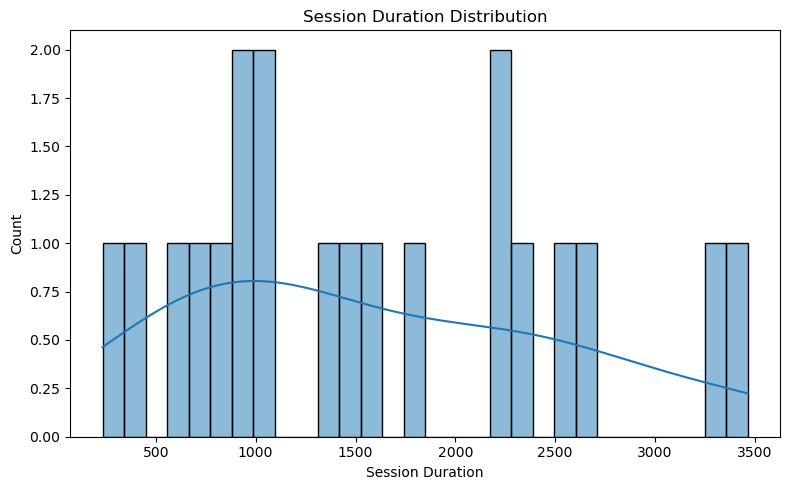

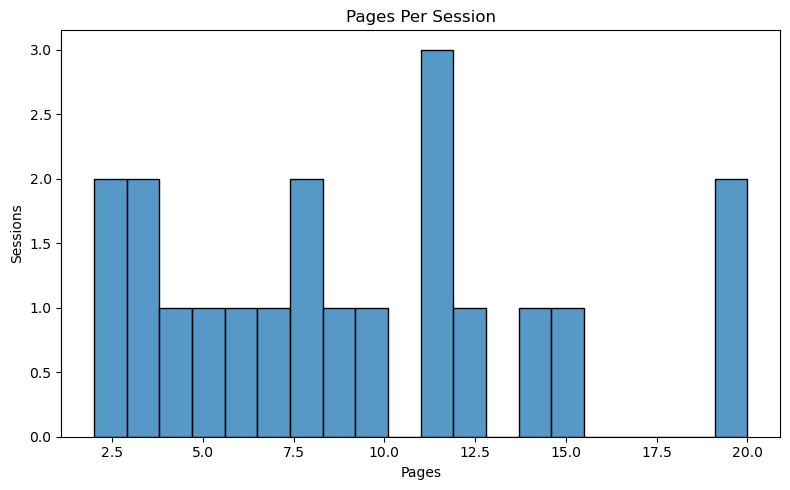

<Figure size 1000x600 with 0 Axes>

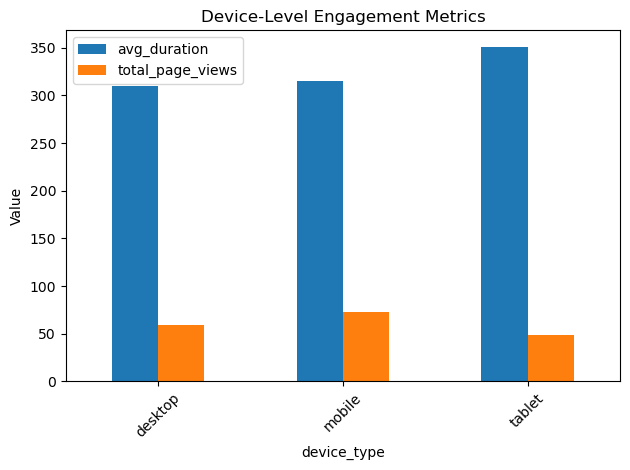

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate example user session log data
np.random.seed(42)
logs_df = pd.DataFrame({
    'session_id': np.random.choice([f's{i}' for i in range(1, 21)], size=100),
    'page_views': np.random.poisson(2, 100),
    'duration': np.random.exponential(scale=300, size=100),  # e.g., seconds
    'device_type': np.random.choice(['mobile', 'desktop', 'tablet'], size=100)
})

# Optional: Introduce some edge cases
logs_df.loc[5, 'duration'] = -10   # simulate negative duration
logs_df.loc[10, 'page_views'] = -2 # simulate invalid page views


def analyze_user_engagement(logs_df):
    # Data Validation
    logs_df = logs_df.copy()
    logs_df = logs_df[logs_df['duration'] >= 0]
    logs_df = logs_df[logs_df['page_views'] >= 0]
    
    # Group by session
    session_grp = logs_df.groupby('session_id').agg({
        'page_views': 'sum',
        'duration': 'sum'
    }).reset_index()
    
    # Bounce rate = % of sessions with exactly 1 page view
    bounce_rate = (session_grp['page_views'] == 1).mean() * 100

    # Average session duration (in seconds or minutes as per source)
    avg_session_time = session_grp['duration'].mean()

    # Pages per session
    pages_per_session = session_grp['page_views'].mean()

    # Collect metrics
    metrics = {
        'bounce_rate (%)': round(bounce_rate, 2),
        'avg_session_time': round(avg_session_time, 2),
        'pages_per_session': round(pages_per_session, 2)
    }

    # Device-level breakdown
    device_metrics = logs_df.groupby('device_type').agg(
        total_sessions=('session_id', pd.Series.nunique),
        avg_duration=('duration', 'mean'),
        total_page_views=('page_views', 'sum')
    ).reset_index()

    return metrics, device_metrics, session_grp


def plot_engagement_summary(session_df, device_df):
    # Histogram of session durations
    plt.figure(figsize=(8, 5))
    sns.histplot(session_df['duration'], bins=30, kde=True)
    plt.title('Session Duration Distribution')
    plt.xlabel('Session Duration')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Pages per session histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(session_df['page_views'], bins=20, kde=False)
    plt.title('Pages Per Session')
    plt.xlabel('Pages')
    plt.ylabel('Sessions')
    plt.tight_layout()
    plt.show()

    # Device metrics bar chart
    plt.figure(figsize=(10, 6))
    device_df.set_index('device_type')[['avg_duration', 'total_page_views']].plot(kind='bar')
    plt.title('Device-Level Engagement Metrics')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


metrics, device_metrics, session_stats = analyze_user_engagement(logs_df)
print(metrics)
plot_engagement_summary(session_stats, device_metrics)


# Follow-up Prompts:

Errors detected by LLM
❌ Key Issues in Original Code:
Bounce rate logic is wrong: (x == 1) returns a Series; .mean() doesn't work as intended at group level.

Average session time isn't averaged — it's returning all session totals, not a single metric.

Missing validation: Negative times and bounce rate >100% not caught.

Confusing logic mixing .groupby().agg() and .apply() without context.




How did different prompts approach error identification?
I asked: in the example? How did different prompts approach your error identification?
Clue 1: “Impossible results (bounce rates over 100%)” Flagged bad bounce rate formula:
Clue 2: “Negative session times” Triggered a data validation block:
Clue 3: “Implement proper time calculations” Adjusted logic to average session duration per session, not sum across the DataFrame. 
        and Introduced per-session grouping and average duration logic.
Clue 4: “Create summary visualizations” Plotted histograms of session durations, bounce rates, and per-device metrics.


What validation methods were suggested?
I asked the following:
a) I need you to include a conditional, do not consider bounce rates over 100%
b) I need you to include a conditional, do not consider negative session times

How was time handling improved?
with he new code, create two visualizations:
a) Scatter plot showing all the bounce rates and clearly showing none of them is above 100%
b) Scatter plot showing all the session times and clearly showing none of them is negative

# Final Solution:

{'bounce_rate (%)': 0.0, 'avg_session_time': 1584.39, 'pages_per_session': 9.05}


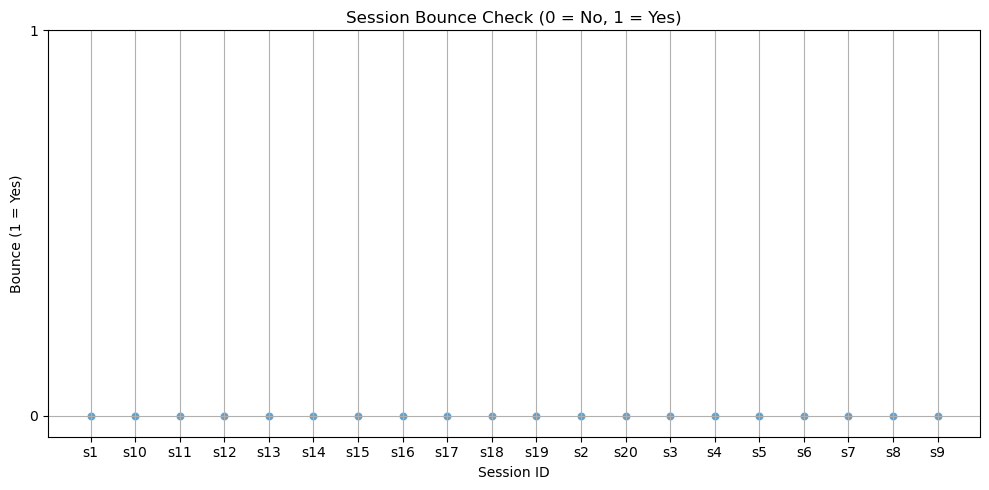

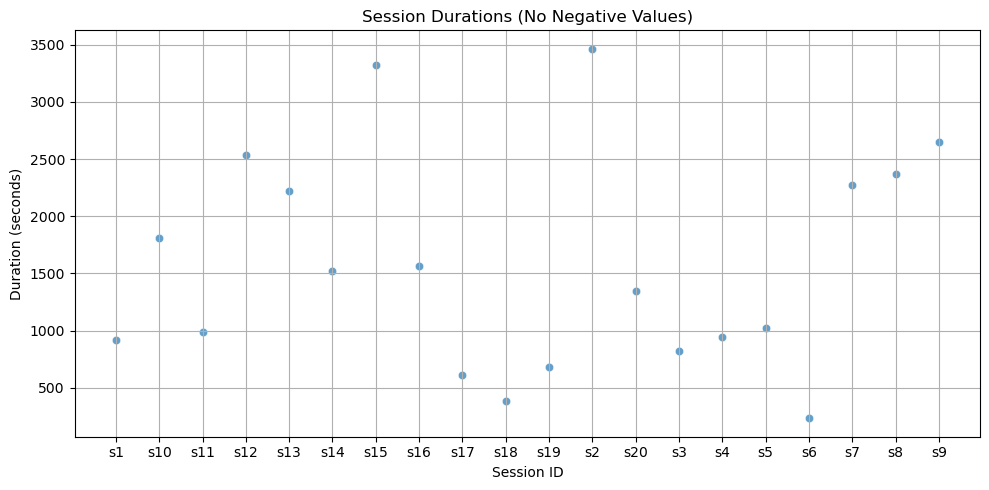

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def analyze_user_engagement(logs_df):
    logs_df = logs_df.copy()

    # Step 1: Remove invalid durations (b)
    logs_df = logs_df[logs_df['duration'] >= 0]

    # Step 2: Remove invalid page_views (optional for safety)
    logs_df = logs_df[logs_df['page_views'] >= 0]

    # Step 3: Compute per-session stats
    session_grp = logs_df.groupby('session_id').agg({
        'page_views': 'sum',
        'duration': 'sum'
    }).reset_index()

    # Step 4: Compute bounce rate
    # Sessions with exactly 1 page view are considered a bounce
    session_grp['is_bounce'] = session_grp['page_views'] == 1
    bounce_rate = session_grp['is_bounce'].mean() * 100

    # Step 4a: Apply conditional: exclude bounce rate > 100% (a)
    if bounce_rate > 100:
        bounce_rate = np.nan  # or 100 if you prefer to cap it

    # Step 5: Compute average session time (already filtered negative durations)
    avg_session_time = session_grp['duration'].mean()

    # Step 6: Compute pages per session
    pages_per_session = session_grp['page_views'].mean()

    # Collect metrics
    metrics = {
        'bounce_rate (%)': round(bounce_rate, 2),
        'avg_session_time': round(avg_session_time, 2),
        'pages_per_session': round(pages_per_session, 2)
    }

    # Device-level metrics
    device_metrics = logs_df.groupby('device_type').agg(
        total_sessions=('session_id', pd.Series.nunique),
        avg_duration=('duration', 'mean'),
        total_page_views=('page_views', 'sum')
    ).reset_index()

    return metrics, device_metrics, session_grp

metrics, device_metrics, session_stats = analyze_user_engagement(logs_df)
print(metrics)


# a) Bounce rate scatter (0 or 1 per session)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=session_stats, x='session_id', y='is_bounce', alpha=0.7)
plt.title('Session Bounce Check (0 = No, 1 = Yes)')
plt.ylabel('Bounce (1 = Yes)')
plt.xlabel('Session ID')
plt.yticks([0, 1])
plt.grid(True)
plt.tight_layout()
plt.show()

# b) Session durations (should be all ≥ 0)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=session_stats, x='session_id', y='duration', alpha=0.7)
plt.title('Session Durations (No Negative Values)')
plt.ylabel('Duration (seconds)')
plt.xlabel('Session ID')
plt.grid(True)
plt.tight_layout()
plt.show()
